In [1]:
%pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
total_data = pd.read_excel(io='./test_data.xlsx')
#pd.read_excel('./')

In [4]:
print('전체 리뷰 개수 : ', len(total_data))

전체 리뷰 개수 :  1002


In [5]:
total_data

,Unnamed: 0,text
0,0,오늘 도착해서 바로 먹어봤네요~괴산이 고향이라 고향의 과일을 먹으니 더 맛있네요 많...
1,1,"앱 깔고 지웠다만 세번째네요. 처음에는 앱 구동 시 튕기면서 계속 꺼졌고, 앱을 새..."
2,2,이거 완전 재밌게봤는데..평점 왜이리 낮음??ㅠ
3,3,영국 거리를 활보 하고 다니면서 마차로 동네 파괴하고 다니는게임 노가다 수집요소만 ...
4,4,괴산대학찰옥수수는 정말 맛있어요 씹으면톡톡 터지는 그맛은 찰지고 맛있어서 자꾸자꾸...
...,...,...
997,997,멀 말하고자하는지 아직도 이해가....공포도 아니여서 실망;ㅁ;
998,998,캐시관련 이벤트 관련 미지급이 매우 많고 문의를 해도 동문서답이 많음 뽑기권은 제대...
999,999,잘 보고있긴한데 점점 갈수록 짜지는거같아요;; 처음에는 걍 만화 3편보면 100캐시...
1000,1000,여자 친구와 제주도로 첫 여행을 가게되어 숙소를 어디로 예약할 지 고민하다가 이왕하...


In [6]:
total_data = total_data.drop(total_data.columns[0],axis='columns')
total_data

,text
0,오늘 도착해서 바로 먹어봤네요~괴산이 고향이라 고향의 과일을 먹으니 더 맛있네요 많...
1,"앱 깔고 지웠다만 세번째네요. 처음에는 앱 구동 시 튕기면서 계속 꺼졌고, 앱을 새..."
2,이거 완전 재밌게봤는데..평점 왜이리 낮음??ㅠ
3,영국 거리를 활보 하고 다니면서 마차로 동네 파괴하고 다니는게임 노가다 수집요소만 ...
4,괴산대학찰옥수수는 정말 맛있어요 씹으면톡톡 터지는 그맛은 찰지고 맛있어서 자꾸자꾸...
...,...
997,멀 말하고자하는지 아직도 이해가....공포도 아니여서 실망;ㅁ;
998,캐시관련 이벤트 관련 미지급이 매우 많고 문의를 해도 동문서답이 많음 뽑기권은 제대...
999,잘 보고있긴한데 점점 갈수록 짜지는거같아요;; 처음에는 걍 만화 3편보면 100캐시...
1000,여자 친구와 제주도로 첫 여행을 가게되어 숙소를 어디로 예약할 지 고민하다가 이왕하...


In [8]:
total_data['text'] = total_data['text'].str.replace("[^ㄱ-하-ㅣ가-힣]","")
total_data['text'].replace('',np.nan, inplace=True)

In [9]:
%cd Mecab-ko-for-Google-Colab

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트/Mecab-ko-for-Google-Colab


In [28]:
pwd

'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트'

In [10]:

#형태소 분석기로 토큰화
mecab = Mecab()

#불용어 정의
stopwords = ['은','는','이','가','도','다','의','한','에','하','고','을','를','인','듯','과','와','네','들','게','임','.','!','영화','..']

In [11]:
total_data = total_data.dropna(axis=0)

In [12]:
total_data['tokenized'] = total_data['text'].apply(mecab.morphs)
total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-12-9d689f122e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['tokenized'] = total_data['text'].apply(mecab.morphs)
<ipython-input-12-9d689f122e7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['tokenized'] = total_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


In [14]:
X_val = total_data['tokenized'].values
#y_val = total_data['label'].values

In [42]:
a = pd.read_csv('./prediction_data.csv')
y2 = a.drop(a.columns[0],axis='columns')
y2

,0
0,0
1,0
2,0
3,0
4,0
...,...
996,0
997,0
998,0
999,0


In [15]:
#단어 집합 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_val)

In [16]:
#등장 횟수가 1회인 단어들은 제거
threshold = 2

total_cnt = len(tokenizer.word_index)#총 단어수
rare_cnt = 0 # 등장 횟수가 1회인 단어 카운트

for key, value in tokenizer.word_counts.items():
    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        
print('단어 집합(vocabulary)의 크기 : ',total_cnt)


단어 집합(vocabulary)의 크기 :  6036


In [17]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2838


In [18]:
tokenzier = Tokenizer(vocab_size, oov_token = 'OOV')
tokenzier.fit_on_texts(X_val)
X_val = tokenizer.texts_to_sequences(X_val)

In [19]:
print(X_val[0])

[239, 361, 35, 189, 34, 14, 106, 10, 190, 1954, 62, 1954, 1955, 34, 327, 70, 43, 10, 81, 681, 75]


리뷰의 최대 길이 :  632
리뷰의 평균 길이 : 39.93606393606394


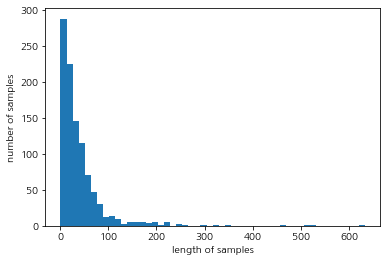

In [20]:
#패딩을 위해 최대 길이와 길이 분포 확인

print('리뷰의 최대 길이 : ', max(len(l) for l in X_val))
print('리뷰의 평균 길이 :' , sum(map(len, X_val))/len(X_val))

plt.hist([len(s) for s in X_val], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [46]:
#최대 길이 80으로 패딩

max_len = 80
X_val = pad_sequences(X_val, maxlen = max_len)

print(X_val.shape)
print(X_val[0])

(1001, 80)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  239  361   35  189   34   14  106   10  190 1954   62
 1954 1955   34  327   70   43   10   81  681   75]


In [22]:
%cd ..

/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트


In [47]:
pwd


'/Users/anseon-yeong/수업/2021-2/텍스트정보처리/프로젝트'

In [48]:
from keras.models import load_model
loaded_model = load_model('./best_model_916.h5')#저장한 모델 불러오기

y_pred = loaded_model.predict(X_val)
y_pred = np.round(y_pred)

In [49]:
y_pred = y_pred.astype('int32')
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [25]:
import pandas as pd
predictions = pd.DataFrame(y_pred).to_csv('./prediction_data.csv')

In [50]:
print("\n 테스트 정확도 : %4f"%(loaded_model.evaluate(X_val,y2)[1]))

32/32 [==============================] - 0s 5ms/step - loss: 0.0945 - accuracy: 0.9930

 테스트 정확도 : 0.993007


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy score : ", accuracy_score(y2,y_pred))
print(classification_report(y2,y_pred))

Accuracy score :  0.993006993006993
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       939
           1       0.91      0.98      0.95        62

    accuracy                           0.99      1001
   macro avg       0.95      0.99      0.97      1001
weighted avg       0.99      0.99      0.99      1001

